# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

## We will write a code to create a function that reads the csv file and and returns a pandas DataFrame.

In [6]:
import pandas as pd

def csv_to_dataframe(path):
    try:
        df = pd.read_csv(path)
        return df
    except Exception as e:
        print("An error occurred:", e)
        return None

Location of the Whoelsale dataset

In [7]:
path = 'C:\\Users\\nas76\\Desktop\\Github Projects\\ml-project-unsupervised-learning\\Wholesale_Data.csv'
df = csv_to_dataframe(path)

We will display the first few rows of the Dataframe

In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


We will print all the column names, look for any missing values and the datatypes of the columns using the info() method

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Check for missing data

In [6]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

print ('\nFeatures : \n', df.columns.tolist())

Missing values:
 Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Features : 
 ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


Here is a grid of box plots, each representing the distribution of a numerical column in a pandas DataFrame df.

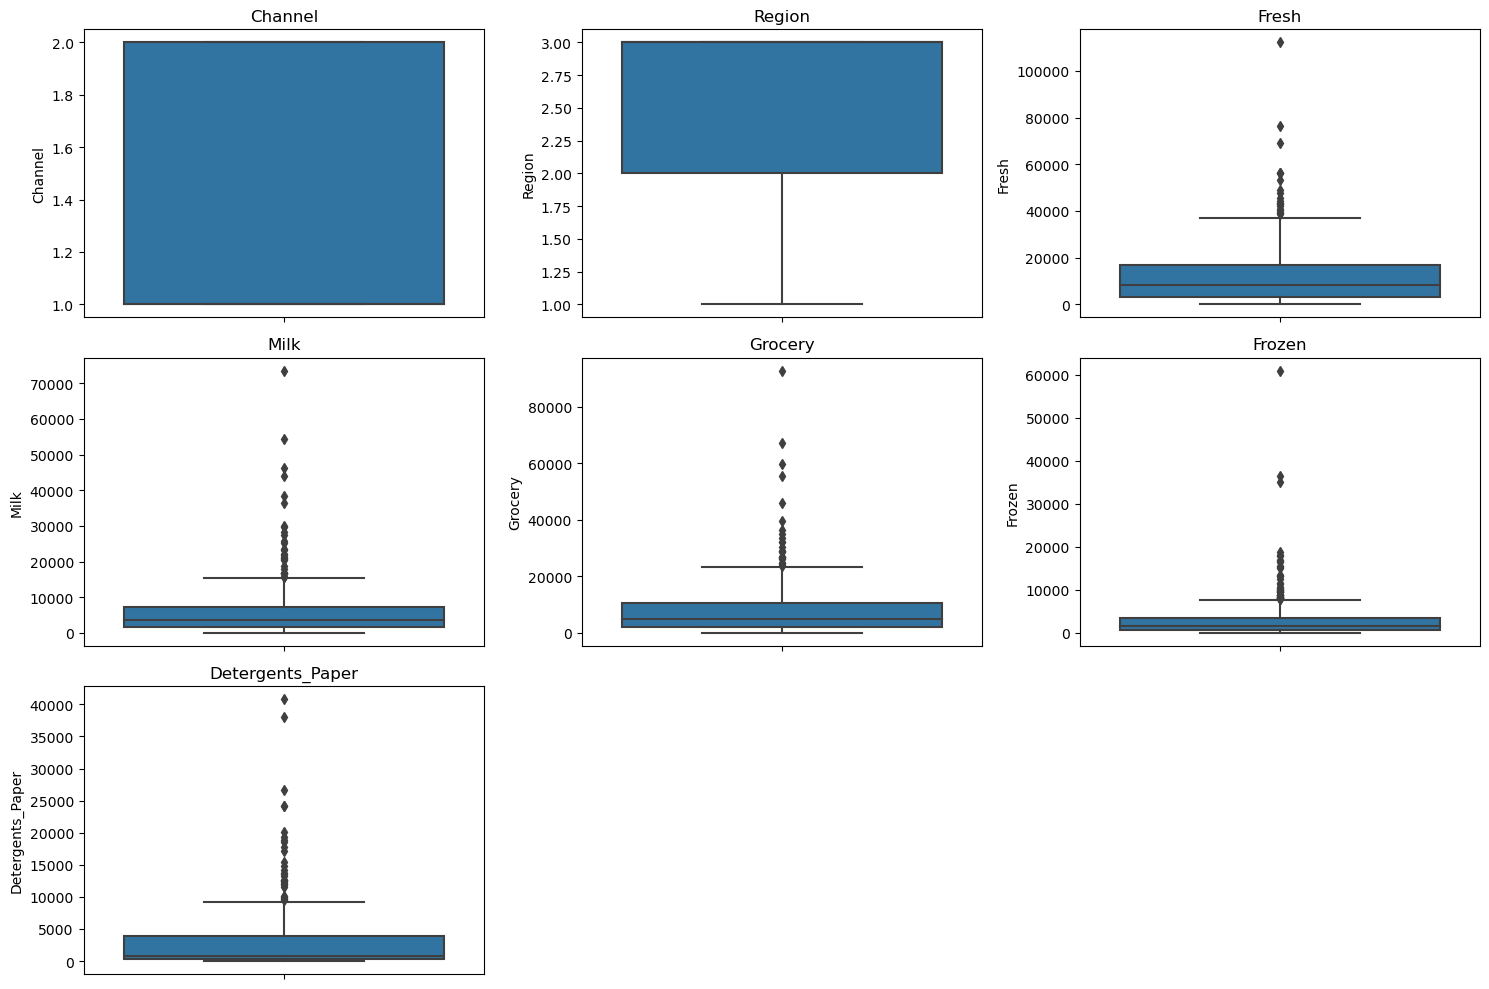

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Here is a grid of Histograms, each representing the distribution of a numerical column in a pandas DataFrame df.

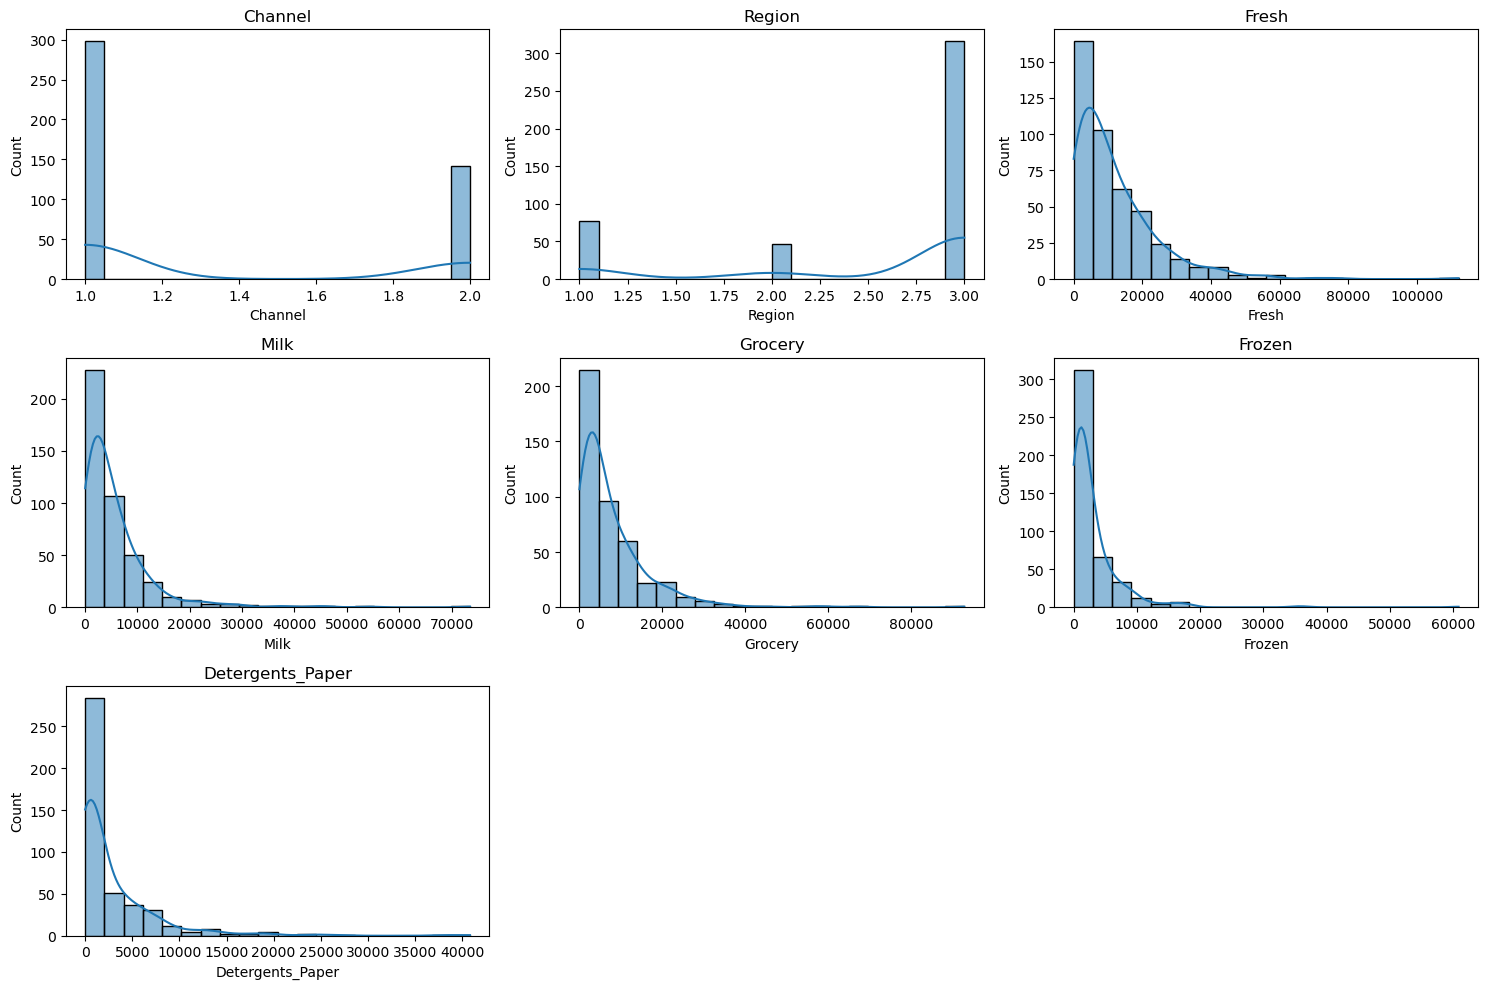

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=col, bins=20, kde=True)  
    plt.title(col)
plt.tight_layout()
plt.show()

Here is a grid of scatterplots, each representing the distribution of a numerical column in a pandas DataFrame df.

<Figure size 1500x1000 with 0 Axes>

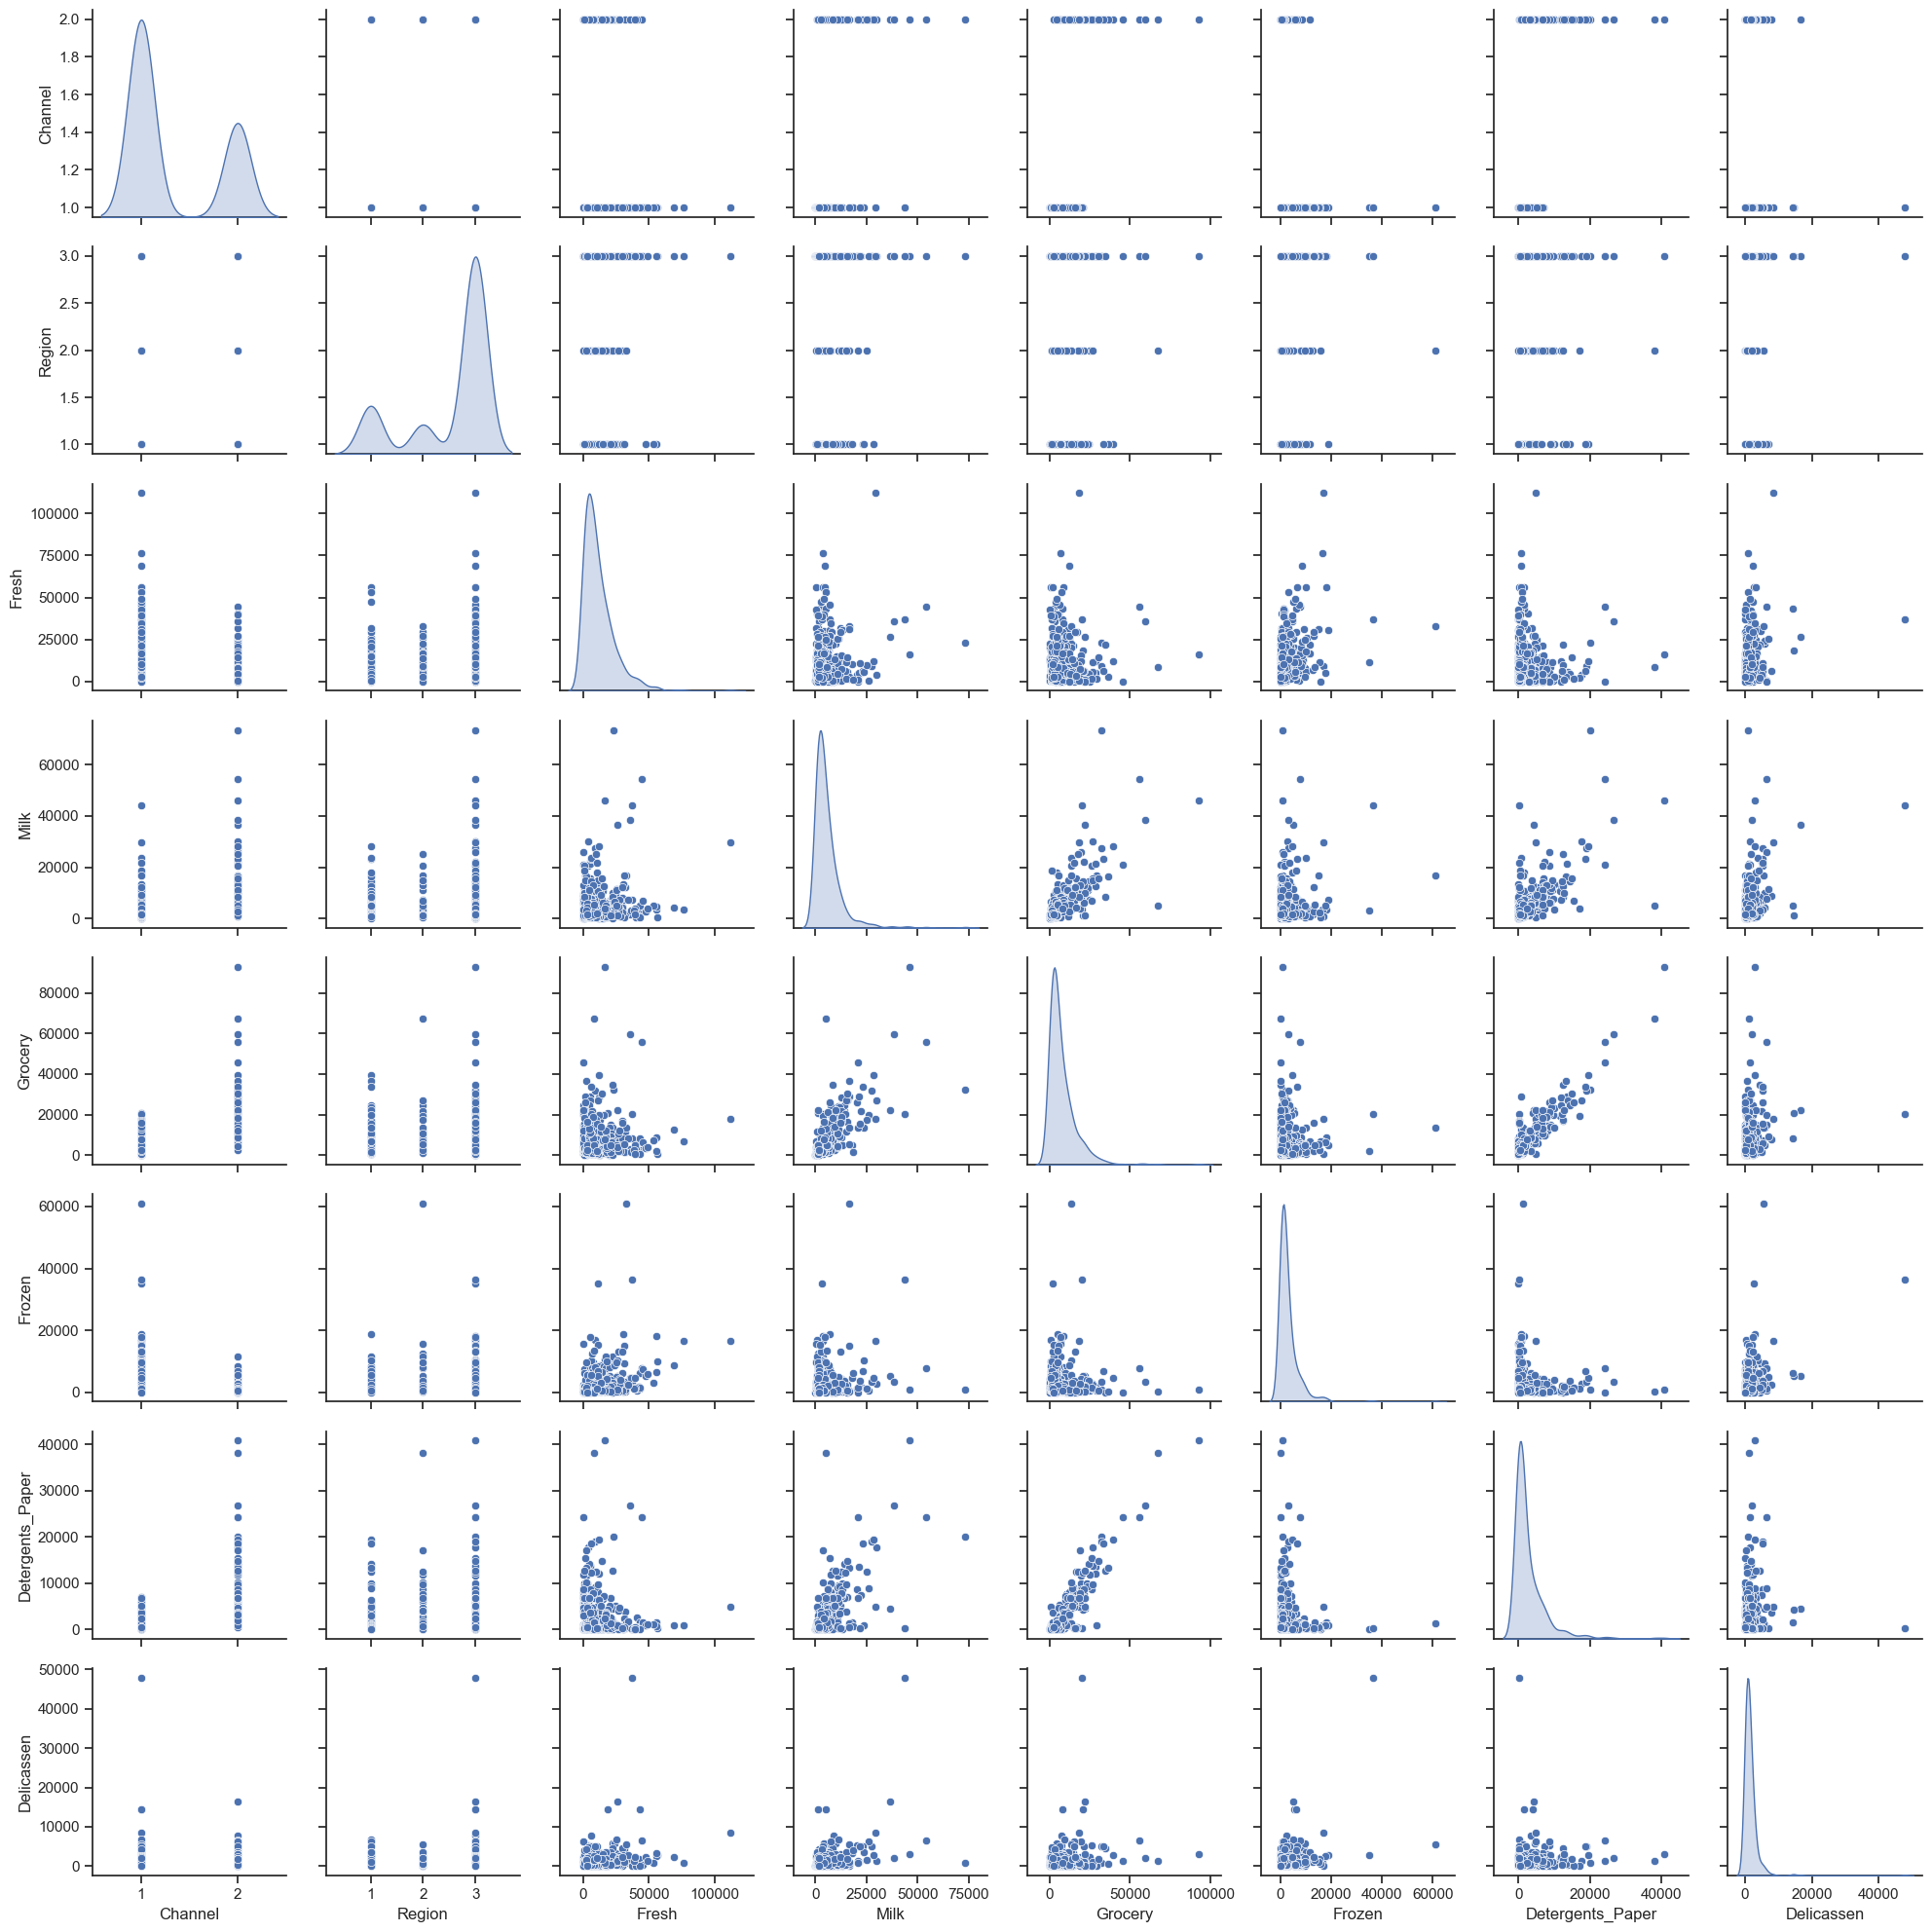

In [14]:
plt.figure(figsize=(15, 10))
sns.set(style="ticks")

sns.pairplot(data=df, diag_kind="kde")  
plt.tight_layout()
plt.show()

We will create heatmap for this dataframe

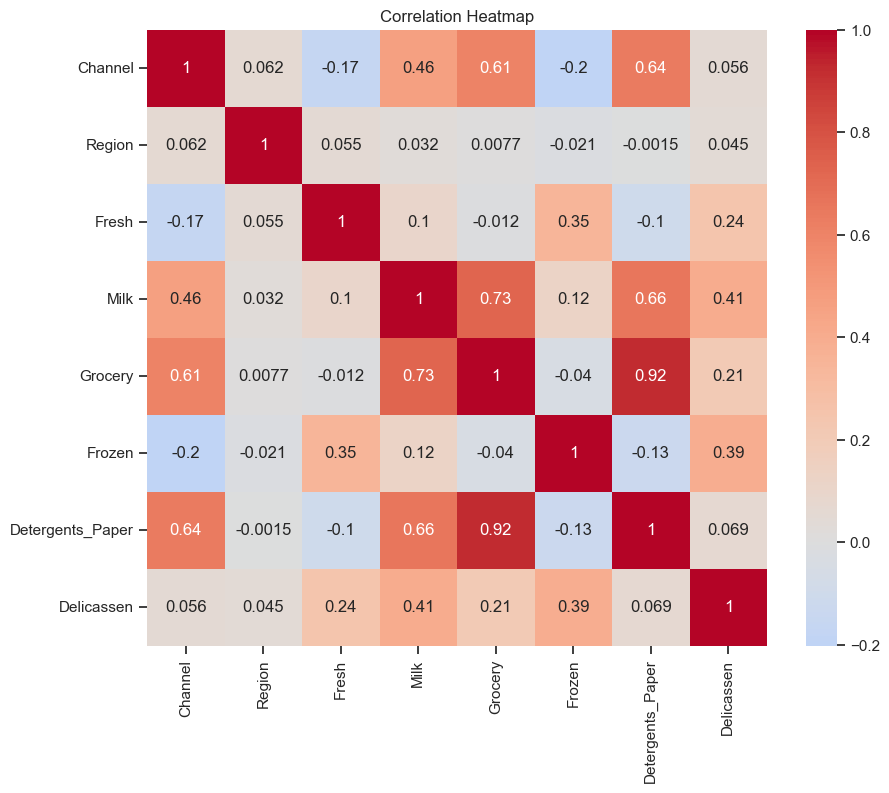

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.show()

Here is to show how many outliers there are using the Z-score method.

In [7]:
import numpy as np

# Calculate z-scores for selected columns
cols_to_check = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
z_scores = np.abs((df[cols_to_check] - df[cols_to_check].mean()) / df[cols_to_check].std())

# Define a z-score threshold for outlier detection (e.g., 3)
z_threshold = 3

# Create a DataFrame indicating whether each data point is an outlier or not
outliers = z_scores > z_threshold

# Count the number of outliers for each column
num_outliers = outliers.sum()

# Print the number of outliers for each column
print("Number of outliers in each column:")
print(num_outliers)

Number of outliers in each column:
Fresh                7
Milk                 9
Grocery              7
Frozen               6
Detergents_Paper    10
Delicassen           4
dtype: int64


Correlation Analysis

In [13]:
import pandas as pd

# Select the columns for correlation analysis
columns_to_correlate = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Calculate the correlation matrix
correlation_matrix = df[columns_to_correlate].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000  


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [4]:
import os

os.environ['OMP_NUM_THREADS'] = '2'

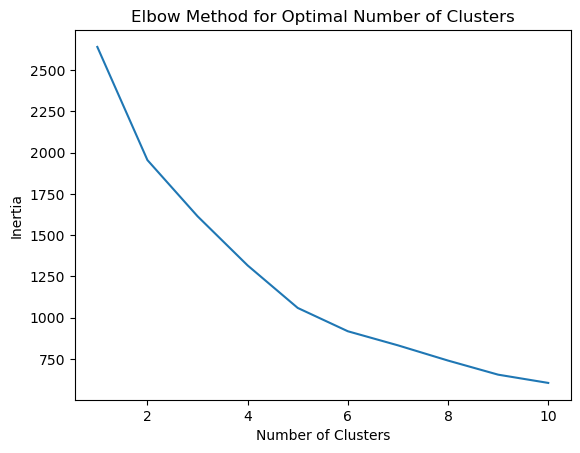

Clustered DataFrame:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        2  
1        1776        0  
2        7844        0  
3        1788        2  
4        5185        2  


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Select the columns for clustering
columns_for_clustering = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Pre-process the data (standardize)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_for_clustering])

# Determine optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)  
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method results
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose the optimal number of clusters (e.g., 3)
n_clusters = 3

# Perform k-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)  
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the clustered DataFrame
print("Clustered DataFrame:")
print(df.head())


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

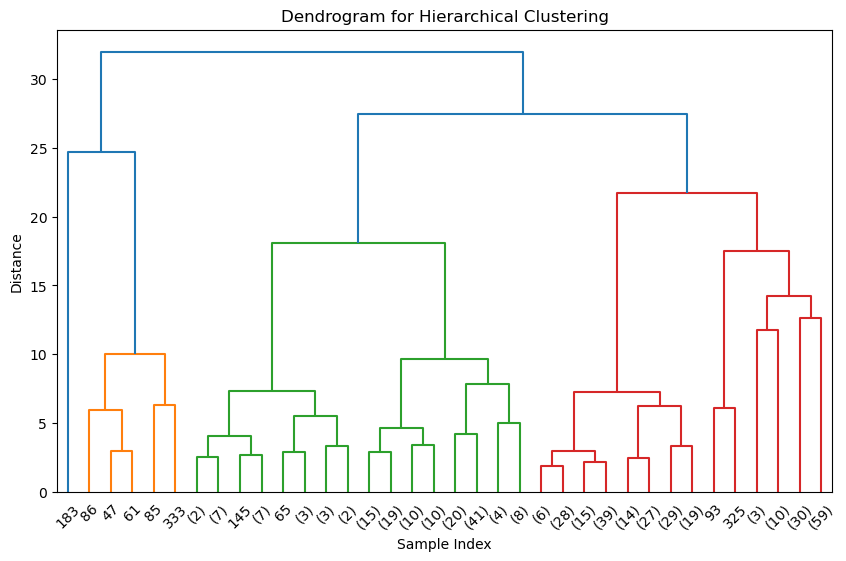

Clustered DataFrame:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        2  
1        1776        2  
2        7844        2  
3        1788        3  
4        5185        3  


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import os

# Load your dataset into the 'df' DataFrame

# Set the number of threads for parallel computation using OpenMP to 2.
os.environ['OMP_NUM_THREADS'] = '2'

# Select the columns for clustering
columns_for_clustering = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Pre-process the data (standardize)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_for_clustering])

# Calculate the linkage matrix
linkage_matrix = linkage(df_scaled, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Determine the optimal number of clusters based on the dendrogram
optimal_clusters = 3  # Adjust based on the dendrogram visualization

# Perform hierarchical clustering
clusters = fcluster(linkage_matrix, optimal_clusters, criterion='maxclust')

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters

# Display the clustered DataFrame
print("Clustered DataFrame:")
print(df.head())


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

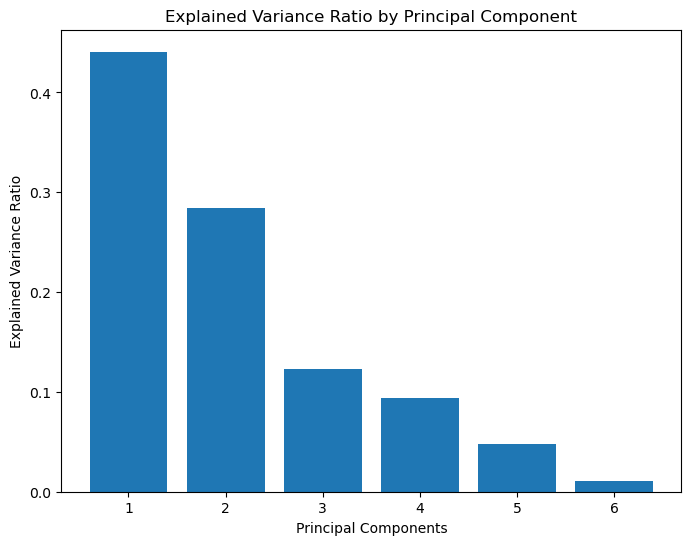

PCA DataFrame:
        PC1       PC2
0  0.193291 -0.305100
1  0.434420 -0.328413
2  0.811143  0.815096
3 -0.778648  0.652754
4  0.166287  1.271434


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os

os.environ['OMP_NUM_THREADS'] = '2'

# Select the columns for PCA
columns_for_pca = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Pre-process the data (standardize)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[columns_for_pca])

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_var_ratio) + 1), explained_var_ratio)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

# Choose the number of principal components (e.g., 2)
n_components = 2

# Perform PCA with the chosen number of components
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Display the PCA DataFrame
print("PCA DataFrame:")
print(pca_df.head())


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- After importing our data using python, we found no missing data. We did however found outliers using the z-score method.
- We used different Data visualization method to determine if there were  correlation between the features and in the in the scatter plot grid you can find the correlation between the features. We found “Fresh” and “Milk” to be correlated at a value of 0.1. 
- The Heatmap also shows the correlation between the feature. We noticed “milk’ and “grocery” to be correlated at 0.73.
- Noticed another correlation with the “Delicassen” and the “Frozen” feature to be high at 0.39. This suggest they are correlated.
